# **Transfer learning and fine-tuning**

Biz ushbu maqolada biz **Transfer learning** va **Fine Tuning** bilan tanishib chiqamiz.<br>
Hozirgi axborot texnologiyalari asrida zamon shiddat bilan rivojlanib borayotgani hech kimga sir emas.Shu rivojlanayotgan zamonda  **AI**(Artificial Intelligence) va **ML**(Machine Learning) ni o'z o'rniga ega.O'z navbatida bu soxalarni ham o'ziga yarasha muammolari bor.Bu muammolardan bittasi ma'lumotlar bilan ishlashdir.Ma'lumotlarni ko'pligi unga ishlov berish nafaqat qiyin va ML train uchun ko'p vaqt talab qiladigan jarayondir.Yana bir muammolardan biri bu ma'lumotlarni kamligida.Xo'sh biz bunday vaziyatda qanday yo'l tutganimiz ma'qbul yechim bo'la oladi? O'sha paytda biz agar avvaldan o'rgatilgan modeldan foydalanadigan bo'lsak anchagina muammolarni chetlab o'tgan bo'lardik.Buni amalga oshirish uchun **Transfer Learning** va **Fine Tuning**dan foydalansak bo'ladi.<br>
<br>
**Transfer Learning** - Bu avvaldan o'rgatilgan modelni xususiyatlarini olib,unga kamroq bo'lgan boshqa ma'lumotlarni qo'shib yangi vazifani bajara oladigan aniqlilari ancha yuqori bo'lgan yangi model yaratishga imkon beruvchi texnika.Bunda biz kam vaqtda eng oxirgi ko'ratkichlarga ega modelga ega bo'lamiz.<br>
![**Transfer Learning**](https://static.javatpoint.com/tutorial/machine-learning/images/transfer-learning-in-machine-learning.png)<br>
<br>
<br>
<br>
**Fine Tuning** - Bu avvaldan o'rgatilgan modelni ma'lum bir qatlamlarini bo'shatadi va o'sha qatlamlarda qaytadan o'rgatish ishlarini olib borsak bo'ladi.<br>
![**Fine Tuning**](https://miro.medium.com/v2/resize:fit:720/format:webp/0*wbU77jl55RGij3mV.jpg)
<br>
<br>
<br>
<br>
Biz Transfer Learning va Fine Tuning dan foydalangan holda mushuk va itni aniqlaydigan model yoratamiz.Bu ishni biz Tensorflowda amalga oshiramiz:<br>
Biz jarayonni qudagi ketma ketlikda amalga oshiramiz:<br>
1. Ma'lumotlarni yuklab olamiz(bunda biz tensorflow.keras ma'lumotlaridan fordalanamiz) 
2. Yuklab olingan ma'lumotlarga ishlov beramiz
3.


## Kerakli Kutubxonalar

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import image_dataset_from_directory 
import os
from tensorflow.keras.applications import MobileNetV2,VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,AveragePooling2D,Dropout,Flatten

## Ma'lumotlarni yuklash.
<br>
Ma'lumotlarni yuklashda biz os va keras.utilsdan image_dataset_from_directorydan foydalanmamiz bu haqida to'liq https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory da tanishib chiqishingiz mumkun.Bu directory qabul qiladi.Uni biz  train_dir orqali beramiz.

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_dataset = image_dataset_from_directory(train_dir,
                                            shuffle=True,
                                            batch_size=BATCH_SIZE,
                                            image_size=IMG_SIZE)
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)


68606236/68606236 [==============================] - 0s 0us/step

Found 2000 files belonging to 2 classes.

Found 1000 files belonging to 2 classes.


## Transfer Learning

Keyingi ishimiz avvaldan o'rgatilgan modelni olishimiz kerak.Biz uni tensorflow.keras.applications olsak bo'ldi.To'liq https://www.tensorflow.org/api_docs/python/tf/keras/applications da tanishib chiqishingiz mumkun.Bu yerda e'tibor berishimiz kerak bo'lgan joyi bu include_top qismidir.Ya'ni aga bu True bo'lsa classification layersni  oladi.Agar bu False bo'lsa classification layersni olmaydi va biz o'zimizclassification layersni yozish imkoniyatiga ega bo'lamiz.

In [3]:
base_model = VGG16(input_shape=(224,224,3),include_top=False)


58889256/58889256 [==============================] - 0s 0us/step


In [4]:
base_model.summary()

Model: "vgg16"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         

                                                                 

 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      

                                                                 

 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     

                                                                 

 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         

                                                                 

 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     

                                                                 

 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    

                                                                 

 block2_pool (MaxPooling2D)  (None, 56, 56, 1

Endi bizda classification layersga ega bo'lmagan 14,714,688 ga ega bo'lgan avvaldan o'qitilgan model bor.Biz train qilayotgan paytimizda avvalgi xusiyatlarni yo'qotib qo'ymaslik avval o'qitilgan modelni muzlatib qo'yishimiz kerak bo'ladi.

In [5]:
base_model.trainable = False

In [6]:
base_model.summary()

Model: "vgg16"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         

                                                                 

 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      

                                                                 

 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     

                                                                 

 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         

                                                                 

 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     

                                                                 

 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    

                                                                 

 block2_pool (MaxPooling2D)  (None, 56, 56, 1

Biz endi classification layers yozilgan va bizni avvaldan o'qitilgan modelimiz jamlangan yangi model yaratishimiz kerak bo'ladi.

In [7]:
model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.2),
    Dense(1)
])

In [8]:
model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 vgg16 (Functional)          (None, 7, 7, 512)         14714688  

                                                                 

 flatten (Flatten)           (None, 25088)             0         

                                                                 

 dropout (Dropout)           (None, 25088)             0         

                                                                 

 dense (Dense)               (None, 1)                 25089     

                                                                 


Total params: 14,739,777

Trainable params: 25,089

Non-trainable params: 14,714,688

_________________________________________________________________


In [9]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

Ko'rib turibmizki biz hali yangi modelimizni o'qitganimiz yo'q o'z ma'lumotlarimiz bilan va aniqlik 0.5470 ni tashkil qilayabdi.

In [10]:
model.evaluate(validation_dataset)

32/32 [==============================] - 18s 170ms/step - loss: 6.9614 - accuracy: 0.5420


[6.96138858795166, 0.5419999957084656]

## Model Training

In [11]:
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=validation_dataset)

Epoch 1/10

63/63 [==============================] - 16s 231ms/step - loss: 2.7298 - accuracy: 0.7855 - val_loss: 0.7535 - val_accuracy: 0.9070

Epoch 2/10

63/63 [==============================] - 12s 183ms/step - loss: 0.7250 - accuracy: 0.9260 - val_loss: 0.4938 - val_accuracy: 0.9350

Epoch 3/10

63/63 [==============================] - 12s 185ms/step - loss: 0.3317 - accuracy: 0.9525 - val_loss: 0.3936 - val_accuracy: 0.9470

Epoch 4/10

63/63 [==============================] - 12s 187ms/step - loss: 0.2810 - accuracy: 0.9625 - val_loss: 0.3651 - val_accuracy: 0.9520

Epoch 5/10

63/63 [==============================] - 12s 190ms/step - loss: 0.1775 - accuracy: 0.9745 - val_loss: 0.3768 - val_accuracy: 0.9590

Epoch 6/10

63/63 [==============================] - 12s 192ms/step - loss: 0.1071 - accuracy: 0.9820 - val_loss: 0.3216 - val_accuracy: 0.9620

Epoch 7/10

63/63 [==============================] - 13s 197ms/step - loss: 0.0739 - accuracy: 0.9820 - val_loss: 0.3154 - val_acc

Bizni modelimiz tayyor.Aniqliklari ham yaxshi.Keling endi buni sinab ko'ramiz.

In [12]:
model.evaluate(validation_dataset)

32/32 [==============================] - 4s 121ms/step - loss: 0.3229 - accuracy: 0.9640


[0.3229474723339081, 0.9639999866485596]

Avvalgi sinovimizda model 0.5470 ni ko'rsatayotgan edi.Modelga o'zma'lumotlarimizni qo'shib o'qitganimizdan so'ng aniqlik 0.9660 ga ko'tarildi.

O'rganish jarayonini quydagi grafiklarda ham ko'rishingiz mumkun.

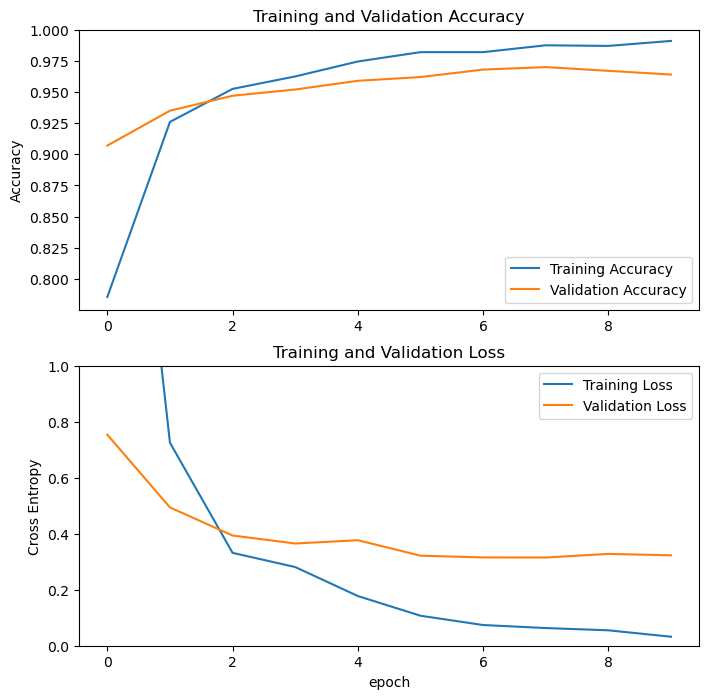

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Fine Tuning

Keling Fine tuning nima ekanligini bir eslab olaylik.Bu avvaldan o'rgatilgan modelni ma'lum bir layerlarni muzlatib qo'yib qolgani o'qitishdan iborat edi.Shunday ekan biz yuqorida base_modelimizni hamma layerlarini muzlatib qo'ygan edik.Endi biz fine tuning qilmochimiz shuning uchun uni ochamiz.

In [14]:
base_model.trainable = True

In [15]:
base_model.summary()

Model: "vgg16"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         

                                                                 

 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      

                                                                 

 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     

                                                                 

 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         

                                                                 

 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     

                                                                 

 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    

                                                                 

 block2_pool (MaxPooling2D)  (None, 56, 56, 1

In [16]:
len(base_model.layers)#layerlar soni 19 ta

19

In [17]:
#Men bu yerda modelni hamma layerlarini hammasini muzlatmoqchiman.Siz ba'zi layerlarni ochib quyishingiz mumkun.
for layer in base_model.layers[:19]:
    layer.trainable = False

In [18]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 vgg16 (Functional)          (None, 7, 7, 512)         14714688  

                                                                 

 flatten (Flatten)           (None, 25088)             0         

                                                                 

 dropout (Dropout)           (None, 25088)             0         

                                                                 

 dense (Dense)               (None, 1)                 25089     

                                                                 


Total params: 14,739,777

Trainable params: 25,089

Non-trainable params: 14,714,688

_________________________________________________________________


Modelni yana o'sha qolgan joyidan o'qitishni davom etamiz.

In [20]:
history_fine = model.fit(train_dataset,
                         epochs=20,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20

63/63 [==============================] - 13s 195ms/step - loss: 0.0348 - accuracy: 0.9930 - val_loss: 0.3266 - val_accuracy: 0.9640

Epoch 11/20

63/63 [==============================] - 13s 197ms/step - loss: 0.0385 - accuracy: 0.9910 - val_loss: 0.3295 - val_accuracy: 0.9610

Epoch 12/20

63/63 [==============================] - 13s 203ms/step - loss: 0.0228 - accuracy: 0.9950 - val_loss: 0.3343 - val_accuracy: 0.9610

Epoch 13/20

63/63 [==============================] - 13s 194ms/step - loss: 0.0457 - accuracy: 0.9935 - val_loss: 0.3255 - val_accuracy: 0.9670

Epoch 14/20

63/63 [==============================] - 13s 193ms/step - loss: 0.0143 - accuracy: 0.9970 - val_loss: 0.3294 - val_accuracy: 0.9640

Epoch 15/20

63/63 [==============================] - 13s 196ms/step - loss: 0.0254 - accuracy: 0.9945 - val_loss: 0.3281 - val_accuracy: 0.9660

Epoch 16/20

63/63 [==============================] - 12s 194ms/step - loss: 0.0147 - accuracy: 0.9940 - val_loss: 0.3282 - 

In [21]:
model.evaluate(validation_dataset)

32/32 [==============================] - 4s 122ms/step - loss: 0.3238 - accuracy: 0.9670


[0.32377591729164124, 0.9670000076293945]

In [22]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

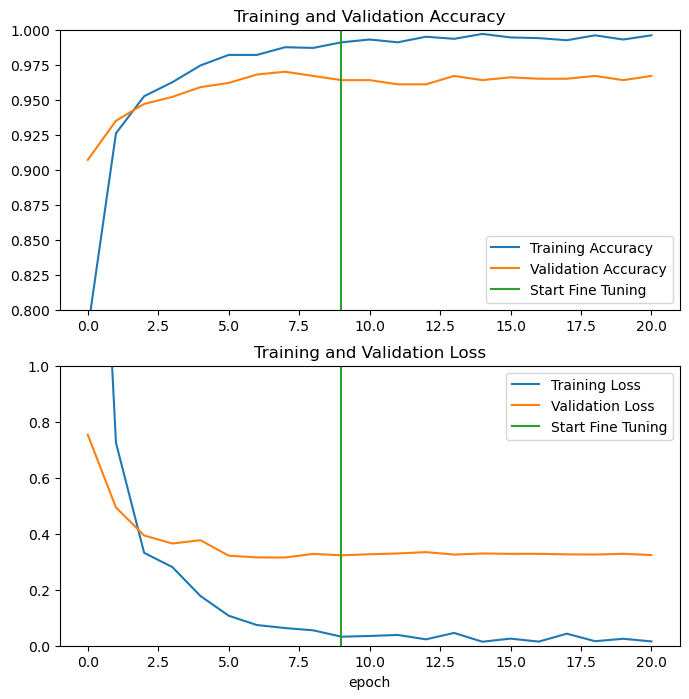

In [23]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([10-1,10-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([10-1,10-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [24]:
# Validation datadan test uchun data olamiz.
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)

In [25]:
#Predection qilib ko'ramiz.
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

In [26]:
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)
predictions

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int32)>

In [27]:
label_batch

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int32)

**Xulosa**<br>
**Transfer Learning** - Bu avvaldan o'rgatilgan modelni olib o'zimizdagi ma'lumotlarni qo'shib o'zimizga kerakli bulgan natijani olishimiz mumkun bo'ladi.
<br>
**Fine Tuning** - Shunday qilib biz ko'rib turgandek fine-tuning bu avvalgan o'rgatilgan modelni ayrim qatlamlarini o'rgatib o'zimizga kerakli bo'lgan natijalarni olishimiz mumkun bo'ladi.